<a href="https://colab.research.google.com/github/NSR9/EVA8/blob/main/S4/NoteBook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NoteBook 2:-
##Target:
* Increase the Capacity of the Model
* Added BatchNormalization in the conv layers
* Added Dropout of 0.05 as a regularization parameter

## Results: (to Change)
* Parameters: **8,340**
* Best Train Accuracy: **98.91% at 11th Epoch**
* Best Test Accuracy: **99.33% at 11th Epoch**

## Analysis:
* Adding Dropout has removed overfitting considerably.
* Adding Batch Normalization helped in increasing the accuracy.
* Increasing Capacity of the model also had impact on the accuracy.
* Image Augmentation is required to improvise the accuracy and reach the goal with the limited parameters.
* The Achieved Accuracy fluctuates a lot


In [9]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

In [10]:
dropout_value = 0.05
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        ##Conv Block 1
        self.conv_block1 = nn.Sequential(
              nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1, bias=False), #28, 28
              nn.ReLU(),
              nn.BatchNorm2d(8),
              nn.Dropout(dropout_value),

              nn.Conv2d(in_channels=8, out_channels=10, kernel_size=3, padding=1, bias=False), #28, 28
              nn.ReLU(),
              nn.BatchNorm2d(10),
              nn.Dropout(dropout_value),
        )

        ##Transition Block 1
        self.trans1 = nn.Sequential(
              nn.MaxPool2d(2, 2),#28, 14
        )

        ##Conv Block 2        
        self.conv_block2 = nn.Sequential(
              nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, padding=0, bias=False),#14, 12
              nn.ReLU(),
              nn.BatchNorm2d(10),
              nn.Dropout(dropout_value),

              nn.Conv2d(in_channels=10, out_channels=16, kernel_size=3, padding=0, bias=False),#12, 10
              nn.ReLU(),
              nn.BatchNorm2d(16),
              nn.Dropout(dropout_value),
              
              nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=0, bias=False),#10, 8
              nn.ReLU(),
              nn.BatchNorm2d(16),
              nn.Dropout(dropout_value),
              
              nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=0, bias=False),#8, 6
              nn.ReLU(),
              nn.BatchNorm2d(16),
              nn.Dropout(dropout_value),
        )

        ##Global Average Pooling
        self.gap = nn.Sequential(
              nn.AvgPool2d(kernel_size=6, stride=1, padding = 0),#6, 1
        ) 

        ##Conv Block 1
        self.conv_block3 = nn.Sequential(
             nn.Conv2d(in_channels=16, out_channels=16, kernel_size=1, padding=0, bias=False),#6, 4
              nn.ReLU(),
              nn.BatchNorm2d(16),
              nn.Dropout(dropout_value),
              
              nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),#1, 1
        )

    def forward(self, x):

        x =  self.conv_block1(x)
        x =  self.trans1(x)
        x =  self.conv_block2(x)
        x =  self.gap(x)
        x =  self.conv_block3(x)
        x = x.view(x.size(0), -1)
        return F.log_softmax(x)

##Model Summary:

#### Params used 8,052

In [11]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
              ReLU-2            [-1, 8, 28, 28]               0
       BatchNorm2d-3            [-1, 8, 28, 28]              16
           Dropout-4            [-1, 8, 28, 28]               0
            Conv2d-5           [-1, 10, 28, 28]             720
              ReLU-6           [-1, 10, 28, 28]               0
       BatchNorm2d-7           [-1, 10, 28, 28]              20
           Dropout-8           [-1, 10, 28, 28]               0
         MaxPool2d-9           [-1, 10, 14, 14]               0
           Conv2d-10           [-1, 10, 12, 12]             900
             ReLU-11           [-1, 10, 12, 12]               0
      BatchNorm2d-12           [-1, 10, 12, 12]              20
          Dropout-13           [-1, 10, 12, 12]               0
           Conv2d-14           [-1, 16,

<ipython-input-10-da35ff0fa509>:70: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [12]:
model.eval()

Net(
  (conv_block1): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.05, inplace=False)
    (4): Conv2d(8, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (5): ReLU()
    (6): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.05, inplace=False)
  )
  (trans1): Sequential(
    (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.05, inplace=False)
    (4): Conv2d(10, 16, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (5): ReLU()
    (6): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=T

## Loading DataSet:


In [13]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)

## Train Test Functions:

In [14]:
from tqdm import tqdm
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0
    correct = 0
    processed = 0
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        processed += len(data)
        pbar.set_description(desc= f'Epoch{epoch} : Loss={loss.item()}  Accuracy={100*correct/processed:0.2f} Batch_id={batch_idx}')
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

    train_loss /= len(train_loader)
    train_acc = 100.00*correct/len(train_loader.dataset)
    return train_acc, train_loss

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    test_acc = 100.00 * correct / len(test_loader.dataset)
    return test_acc, test_loss


## Model Training:

In [15]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [16]:
train_loss_values = []
test_loss_values = []
train_accuracy_values = []
test_accuracy_values = []


In [17]:
for epoch in range(1, 15):
    train_acc, train_loss = train(model, device, train_loader, optimizer, epoch)
    test_acc, test_loss = test(model, device, test_loader)

    train_accuracy_values.append(train_acc)
    train_loss_values.append(train_loss)

    test_accuracy_values.append(test_acc)
    test_loss_values.append(test_loss)

    


  0%|          | 0/469 [00:00<?, ?it/s]<ipython-input-10-da35ff0fa509>:70: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Epoch1 : Loss=0.18584294617176056  Accuracy=91.62 Batch_id=468: 100%|██████████| 469/469 [00:15<00:00, 29.33it/s]



Test set: Average loss: 0.0705, Accuracy: 9774/10000 (97.74%)



Epoch2 : Loss=0.0948280468583107  Accuracy=97.52 Batch_id=468: 100%|██████████| 469/469 [00:16<00:00, 28.71it/s]



Test set: Average loss: 0.0467, Accuracy: 9860/10000 (98.60%)



Epoch3 : Loss=0.09005428105592728  Accuracy=98.09 Batch_id=468: 100%|██████████| 469/469 [00:16<00:00, 28.83it/s]



Test set: Average loss: 0.0381, Accuracy: 9878/10000 (98.78%)



Epoch4 : Loss=0.030664486810564995  Accuracy=98.31 Batch_id=468: 100%|██████████| 469/469 [00:16<00:00, 28.79it/s]



Test set: Average loss: 0.0353, Accuracy: 9892/10000 (98.92%)



Epoch5 : Loss=0.01053394004702568  Accuracy=98.50 Batch_id=468: 100%|██████████| 469/469 [00:16<00:00, 28.74it/s]



Test set: Average loss: 0.0304, Accuracy: 9908/10000 (99.08%)



Epoch6 : Loss=0.04754998907446861  Accuracy=98.62 Batch_id=468: 100%|██████████| 469/469 [00:16<00:00, 28.78it/s]



Test set: Average loss: 0.0269, Accuracy: 9914/10000 (99.14%)



Epoch7 : Loss=0.04507465288043022  Accuracy=98.71 Batch_id=468: 100%|██████████| 469/469 [00:16<00:00, 28.58it/s]



Test set: Average loss: 0.0255, Accuracy: 9926/10000 (99.26%)



Epoch8 : Loss=0.014820032753050327  Accuracy=98.79 Batch_id=468: 100%|██████████| 469/469 [00:15<00:00, 29.32it/s]



Test set: Average loss: 0.0275, Accuracy: 9911/10000 (99.11%)



Epoch9 : Loss=0.044561415910720825  Accuracy=98.83 Batch_id=468: 100%|██████████| 469/469 [00:16<00:00, 29.29it/s]



Test set: Average loss: 0.0232, Accuracy: 9931/10000 (99.31%)



Epoch10 : Loss=0.018450487405061722  Accuracy=98.84 Batch_id=468: 100%|██████████| 469/469 [00:16<00:00, 27.98it/s]



Test set: Average loss: 0.0263, Accuracy: 9918/10000 (99.18%)



Epoch11 : Loss=0.03073512203991413  Accuracy=98.91 Batch_id=468: 100%|██████████| 469/469 [00:16<00:00, 28.90it/s]



Test set: Average loss: 0.0234, Accuracy: 9933/10000 (99.33%)



Epoch12 : Loss=0.017834613099694252  Accuracy=98.89 Batch_id=468: 100%|██████████| 469/469 [00:16<00:00, 29.11it/s]



Test set: Average loss: 0.0246, Accuracy: 9919/10000 (99.19%)



Epoch13 : Loss=0.05857199802994728  Accuracy=98.99 Batch_id=468: 100%|██████████| 469/469 [00:16<00:00, 29.14it/s]



Test set: Average loss: 0.0246, Accuracy: 9920/10000 (99.20%)



Epoch14 : Loss=0.013119586743414402  Accuracy=99.01 Batch_id=468: 100%|██████████| 469/469 [00:16<00:00, 28.99it/s]



Test set: Average loss: 0.0226, Accuracy: 9925/10000 (99.25%)



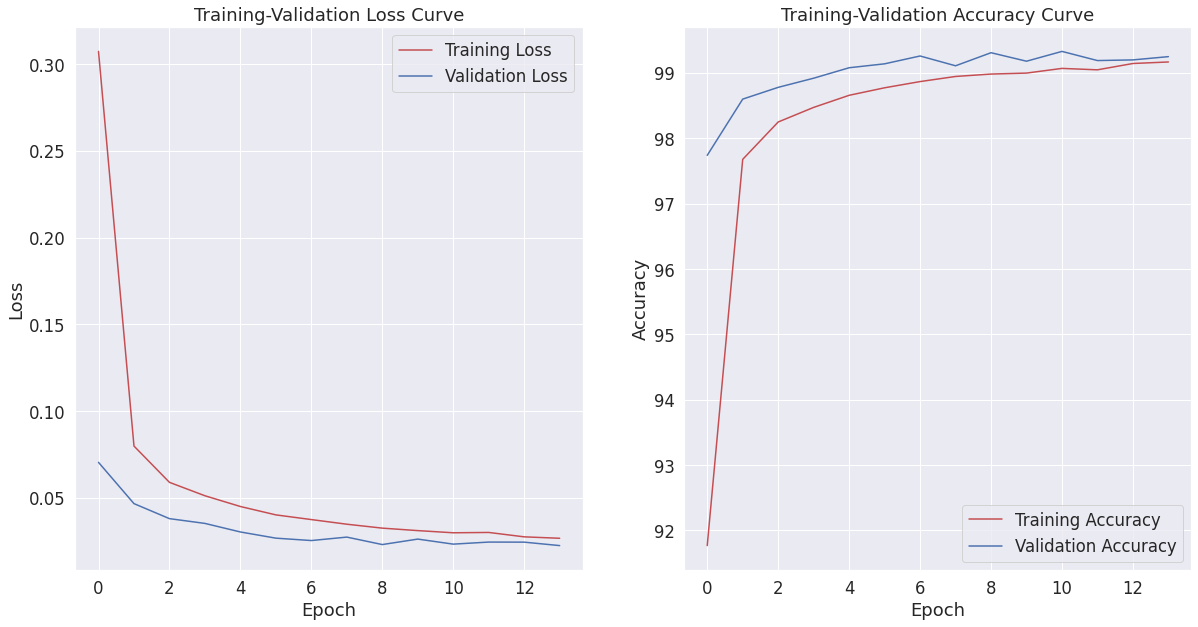

In [18]:
sns.set(style='whitegrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (20,10)

# Plot the learning curve.
fig, (plt1,plt2) = plt.subplots(1,2)
plt1.plot(np.array(train_loss_values), 'r', label="Training Loss")
plt1.plot(np.array(test_loss_values), 'b', label="Validation Loss")
plt2.plot(np.array(train_accuracy_values), 'r', label="Training Accuracy")
plt2.plot(np.array(test_accuracy_values), 'b', label="Validation Accuracy")

plt2.set_title("Training-Validation Accuracy Curve")
plt2.set_xlabel("Epoch")
plt2.set_ylabel("Accuracy")
plt2.legend()
plt1.set_title("Training-Validation Loss Curve")
plt1.set_xlabel("Epoch")
plt1.set_ylabel("Loss")
plt1.legend()

plt.show()